In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
canada=data = pd.ExcelFile("canada.xlsx")
canada

In [3]:
dfs = pd.read_excel('canada.xlsx', sheet_name="Canada by Citizenship",skiprows=range(20),skipfooter=2)

In [4]:
dfs.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
dfs.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
dfs.columns = list(map(str, dfs.columns))
dfs.set_index('Country', inplace=True)
dfs['Total'] = dfs.sum(axis=1)

In [5]:
Years=['1980','1981','1982','1983','1984','1985','1986','1987','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']

In [6]:
dfs.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
dfs.shape

(195, 38)

In [8]:
grouped=dfs.groupby('Country')

In [9]:
haiti=grouped.get_group('Haiti')

In [10]:
haiti

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,Latin America and the Caribbean,Caribbean,Developing regions,1666,3692,3498,2860,1418,1321,1753,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


In [11]:
Immigration=[1682,1619,1598,2491,2080,4744,6503,5868,4152]

In [12]:
years=[2005,2006,2007,2008,2009,2010,2011,2012,2013]

In [13]:
df_haiti = pd.DataFrame(
    {'Immigration': Immigration, 'years': years})

In [14]:
df_haiti.head()

,Immigration,years
0,1682,2005
1,1619,2006
2,1598,2007
3,2491,2008
4,2080,2009


In [15]:
df_haiti.index

RangeIndex(start=0, stop=9, step=1)

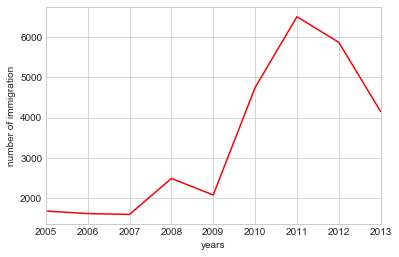

In [16]:
plt.style.use('seaborn-whitegrid')
df_haiti.set_index('years')['Immigration'].plot(color="red");
plt.xlabel("years")
plt.ylabel("number of immigration")
plt.show()

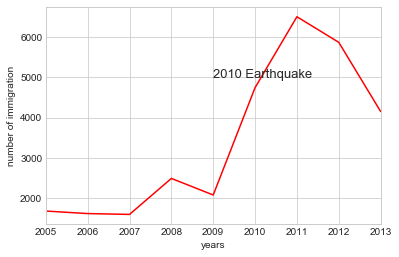

In [17]:
plt.style.use('seaborn-whitegrid')
df_haiti.set_index('years')['Immigration'].plot(color="red");
plt.xlabel("years")
plt.ylabel("number of immigration")
plt.text(2009,5000,"2010 Earthquake",fontsize=13)
plt.show()

In [18]:
india=grouped.get_group('India')

In [19]:
india

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


In [20]:
china=grouped.get_group('China')

In [21]:
china

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


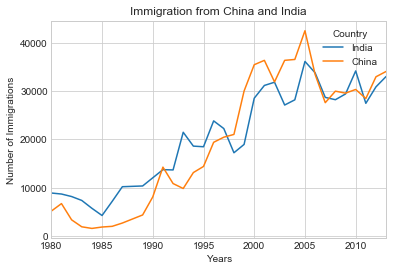

In [22]:
df=dfs.loc[['India','China'], Years]
df=df.transpose()
df.index = df.index.map(int)
df.plot(kind='line')
plt.title('Immigration from China and India')
plt.ylabel('Number of Immigrations')
plt.xlabel('Years')
plt.show()

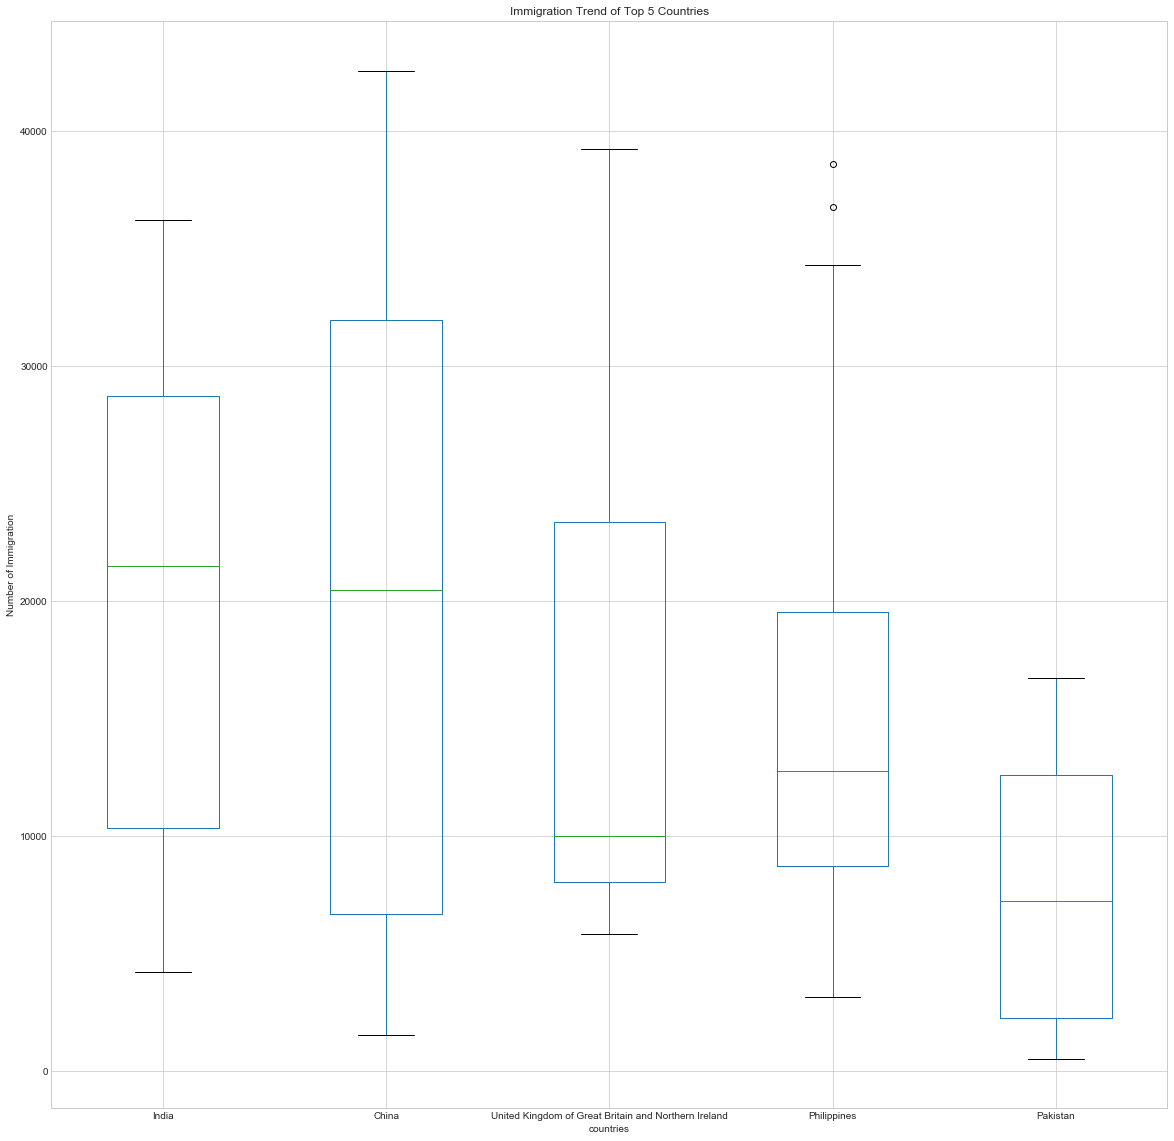

In [23]:
dfs.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = dfs.head(5)
df_top5 = df_top5[Years].transpose()
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='box', figsize=(20,20))
 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigration')
plt.xlabel('countries')
plt.show()
 


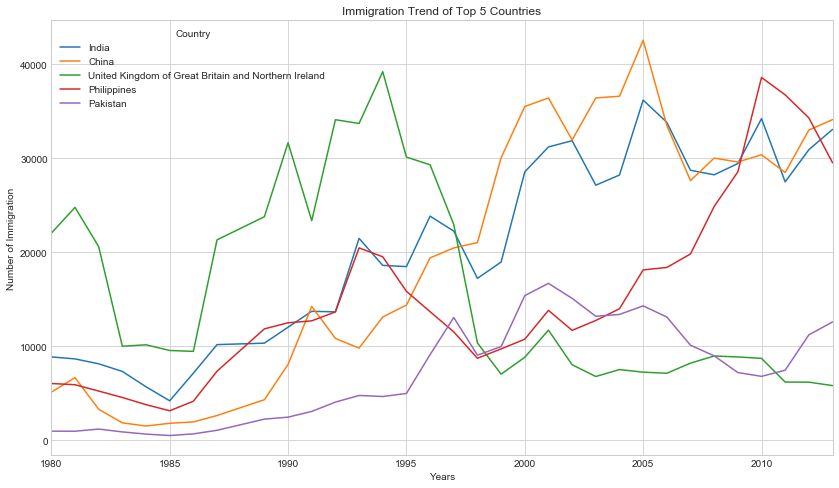

In [24]:
dfs.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = dfs.head(5)
df_top5 = df_top5[Years].transpose()
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))
 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigration')
plt.xlabel('Years')
plt.show()
 


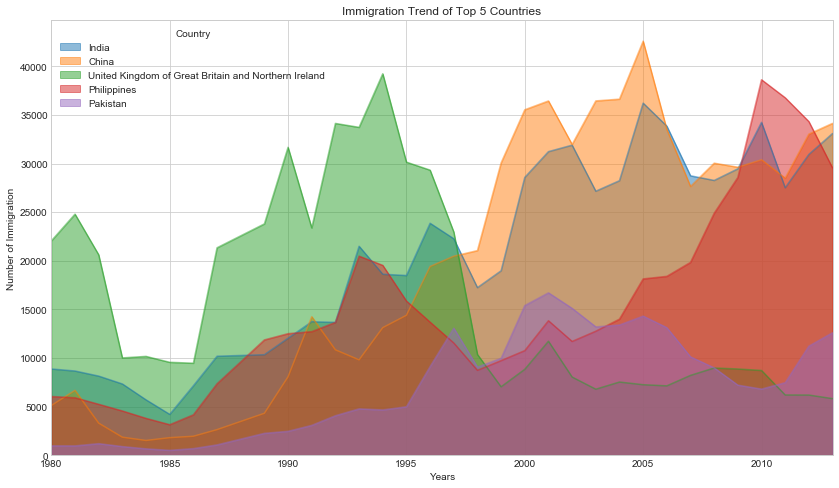

In [25]:
dfs.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = dfs.head(5)
df_top5 = df_top5[Years].transpose()
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',stacked=False, figsize=(14,8))
 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigration')
plt.xlabel('Years')
plt.show()
 


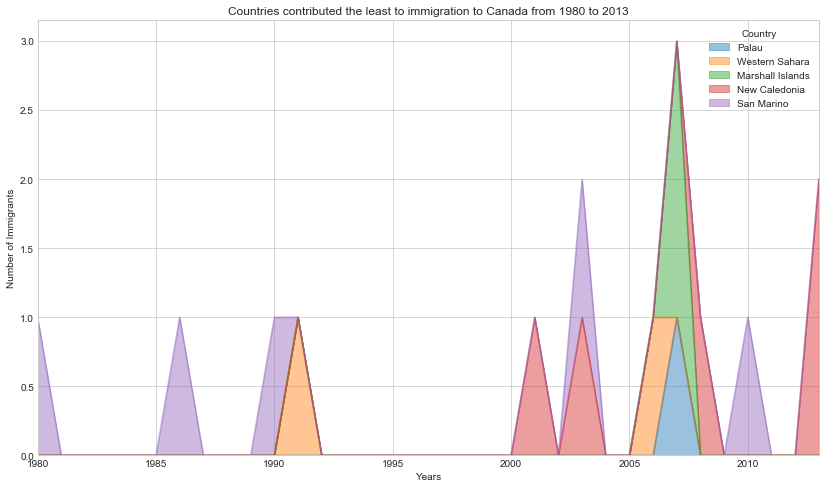

In [26]:
dfs.sort_values(by='Total', ascending=True, axis=0, inplace=True)
df_least=dfs.head(5)
df_least=df_least[Years].transpose()
df_least.index=df_least.index.map(int)
df_least.plot(kind='area',alpha=0.45, figsize=(14,8))
plt.title('Countries contributed the least to immigration to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

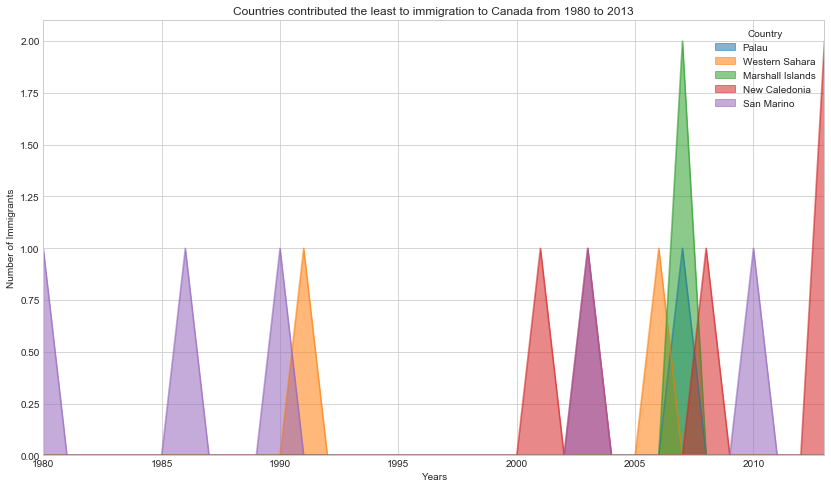

In [27]:
dfs.sort_values(by='Total', ascending=True, axis=0, inplace=True)
df_least=dfs.head(5)
df_least=df_least[Years].transpose()
df_least.index=df_least.index.map(int)
df_least.plot(kind='area',stacked=False,alpha=0.55, figsize=(14,8))
plt.title('Countries contributed the least to immigration to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [28]:
dfs['2013'].count()

195

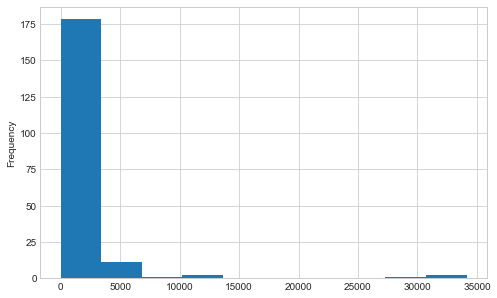

In [29]:
dfs['2013'].plot(kind='hist', figsize=(8, 5))

In [30]:
dfs.loc['Denmark'].head()

Continent               Europe
Region         Northern Europe
DevName      Developed regions
1980                       272
1981                       293
Name: Denmark, dtype: object

In [31]:
dfs.loc['Norway'].head()

Continent               Europe
Region         Northern Europe
DevName      Developed regions
1980                       116
1981                        77
Name: Norway, dtype: object

In [32]:
dfs.loc['Sweden'].head()

Continent               Europe
Region         Northern Europe
DevName      Developed regions
1980                       281
1981                       308
Name: Sweden, dtype: object

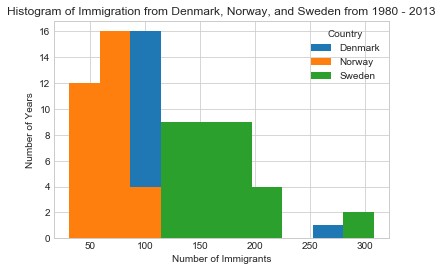

In [33]:
df=dfs.loc[['Denmark','Norway','Sweden'], Years]
df=df.transpose()
df.index = df.index.map(int)
df.plot(kind='hist')
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()


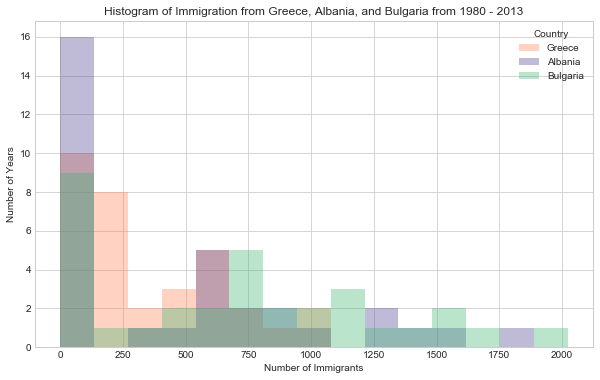

In [34]:
df=dfs.loc[['Greece', 'Albania', 'Bulgaria'], Years]
df=df.transpose()
df.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )
 
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
 
plt.show()

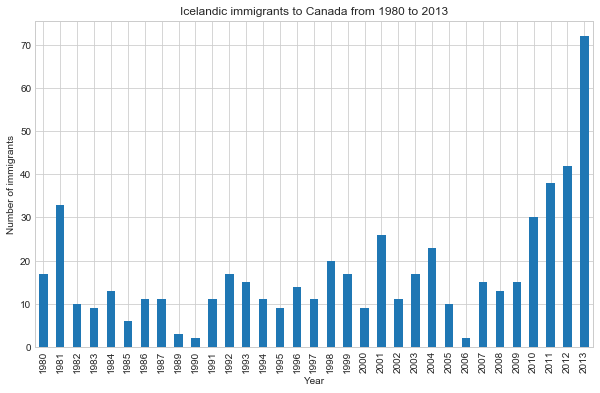

In [35]:
df_iceland = dfs.loc['Iceland', Years]
df_iceland.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 
plt.show()
 


In [36]:
dfs.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df=dfs.head(15)
df

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [37]:
df_count=df.count()
df_count.head()

Continent    15
Region       15
DevName      15
1980         15
1981         15
dtype: int64

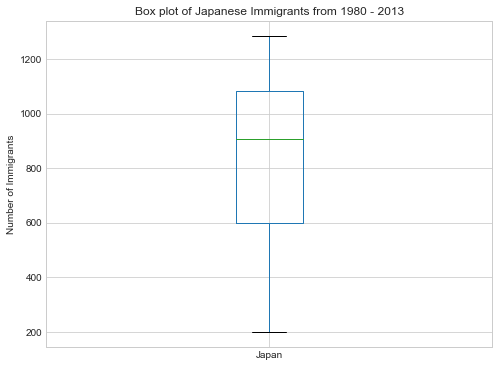

In [38]:
df=dfs.loc['Japan', Years]
df=df.transpose()
df.index = df.index.map(int)
df.plot(kind='box',figsize=(8, 6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

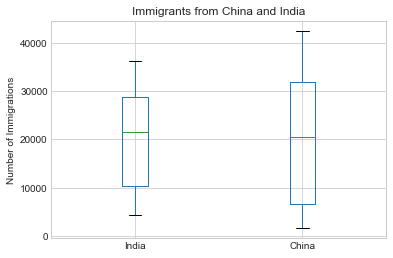

In [39]:
df=dfs.loc[['India','China'], Years]
df=df.transpose()
df.index = df.index.map(int)
df.plot(kind='box')
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrations')
plt.show()

In [40]:
df_total = pd.DataFrame(dfs[Years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['Year', 'total']

In [41]:
df_total.head()

,Year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


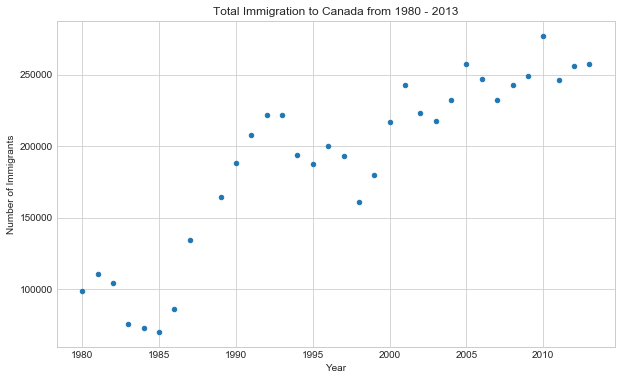

In [42]:
df_total.plot(kind='scatter', x='Year', y='total', figsize=(10, 6))
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()
 

In [45]:
dfn = dfs[Years].transpose() 
dfn.index = map(int, dfn.index)
dfn.index.name = 'Year'
dfn.reset_index(inplace=True)
 

In [46]:
norm_brazil = (dfn['Brazil'] - dfn['Brazil'].min()) / (dfn['Brazil'].max() - dfn['Brazil'].min())
 
norm_argentina = (dfn['Argentina'] - dfn['Argentina'].min()) / (dfn['Argentina'].max() - dfn['Argentina'].min())

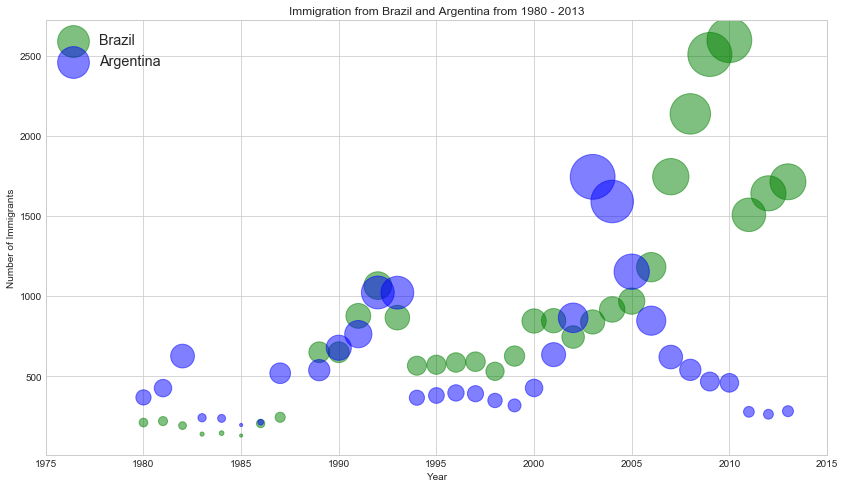

In [47]:
ax0 = dfn.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='green',
                    s=norm_brazil * 2000 + 10,  
                    xlim=(1975, 2015)
                   )
 

ax1 = dfn.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )
 
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')
 

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

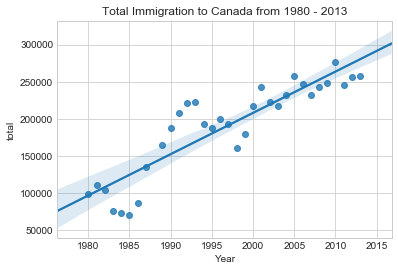

In [50]:
df_total = pd.DataFrame(dfs[Years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['Year', 'total']
ax = sns.regplot(x='Year', y='total', data=df_total)
ax.set_title('Total Immigration to Canada from 1980 - 2013')

In [70]:
df = dfs.loc[['Denmark', 'Norway', 'Sweden'], Years].sum(axis=0)
df.head()

1980    669
1981    678
1982    627
1983    333
1984    252
dtype: int64

Text(0.5, 1.0, 'Total immigrants from Denmark, Sweden and Norway to Canada from 1980 to 2013')

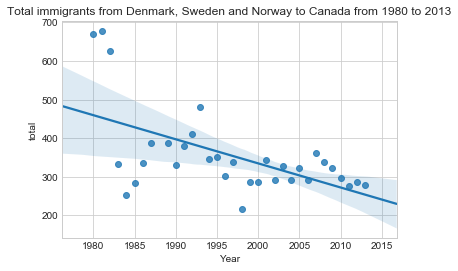

In [69]:
df_total = pd.DataFrame(dfs.loc[['Denmark', 'Norway', 'Sweden'], Years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['Year', 'total']
ax = sns.regplot(x='Year', y='total', data=df_total)
ax.set_title('Total immigrants from Denmark, Sweden and Norway to Canada from 1980 to 2013')

In [ ]:
plt.annotate